In [1]:
import os
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils #to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Dense,Flatten,Activation,Dropout

In [3]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE =(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
INIT_LR = 0.01
BATCH_SIZE =32
EPOCHS_NO = 50 
FAST_RUN = True
lr_find = True


for i in os.listdir(no_fire):
    image_path =os.path.join(no_fire,i)
    img =cv2.imread(image_path)
    img=cv2.resize(img,IMAGE_SIZE)
    images.append(img)
    label.append([0,1]) #[0,1] for non fire class

In [4]:
# defining the classes of the images
classes= ['with_fire', 'without_fire']

# defining the path of the directories of both subfolders

fire = '/Users/vivekgupta/Documents/Fire_Detector/Fire'


# creating an empty list that will store all the images and labels
images = []
label = []

for i in os.listdir(fire):
    image_path =os.path.join(fire,i)
    img =cv2.imread(image_path)
    img=cv2.resize(img,IMAGE_SIZE)
    images.append(img)
    label.append([1,0]) #[1,0] for fire class
    

    
images = np.array(images, dtype='float64')/255 #here, we have converted the images list we got into an array and normalized each of its pixels.

label = np.array(label)
    
    

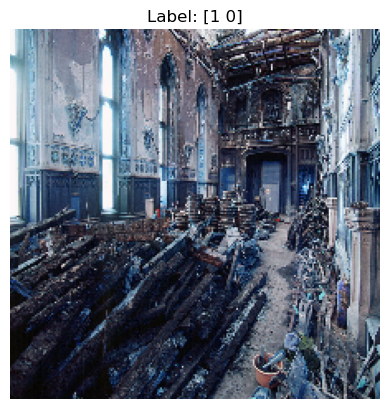

In [5]:
# Choose a random index
random_index = np.random.randint(len(images))

# Retrieve the random image and its corresponding label
random_image = images[random_index]
random_label = label[random_index]

# Display the image
plt.imshow(random_image)
plt.title('Label: {}'.format(random_label))
plt.axis('off')  # Hide axis
plt.show()

In [6]:
train_gen =ImageDataGenerator(rotation_range = 20,
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.3,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],
    height_shift_range = 0.3)

In [7]:
model = Sequential()

model.add(Conv2D(16,(3,3), activation = 'relu', padding = 'same', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 32)      1

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, label, test_size=0.50, shuffle=True, random_state=42)

In [9]:
X_train.shape

(100, 224, 224, 3)

In [10]:
epochs = 50


detection = model.fit(
    train_gen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    epochs=50,
#     callbacks=callbacks
)

model.save('fire_detection.h5')

Epoch 1/50
3/3 [==============================] - 3s 521ms/step - loss: 1.3466 - accuracy: 0.6029 - val_loss: 0.8909 - val_accuracy: 0.1287
Epoch 2/50
3/3 [==============================] - 2s 527ms/step - loss: 1.1412 - accuracy: 0.6029 - val_loss: 0.5745 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 2s 601ms/step - loss: 1.0450 - accuracy: 0.5208 - val_loss: 0.5101 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 2s 417ms/step - loss: 0.9094 - accuracy: 0.6324 - val_loss: 0.6141 - val_accuracy: 0.8812
Epoch 5/50
3/3 [==============================] - 1s 670ms/step - loss: 0.9985 - accuracy: 0.5441 - val_loss: 0.4999 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 1s 687ms/step - loss: 1.0824 - accuracy: 0.6176 - val_loss: 0.6891 - val_accuracy: 0.5248
Epoch 7/50
3/3 [==============================] - 2s 457ms/step - loss: 0.8408 - accuracy: 0.6029 - val_loss: 0.8919 - val_accuracy: 0.0000e+00
Epoch 8/50
3/3 [

/Users/vivekgupta/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


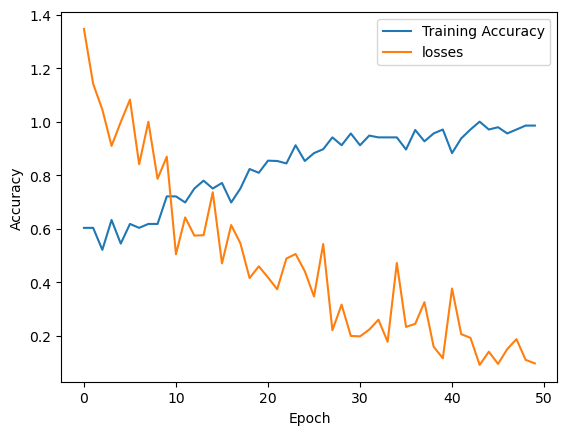

In [11]:
plt.plot(detection.history['accuracy'], label='Training Accuracy')
plt.plot(detection.history['loss'], label='losses')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_dir = '/Users/vivekgupta/Documents/Fire_Detector/output/testing'

test_img=os.listdir(test_dir)
for i in range(10):
    ran_img =random.choice(test_img)
    img_path =os.path.join(test_dir,ran_img)
    img =cv2.imread(img_path)
    img=cv2.resize(img,(IMAGE_HEIGHT, IMAGE_WIDTH))
    
    img_input = img.reshape(1, IMAGE_HEIGHT, IMAGE_WIDTH, 3)  # Reshape for model input
    pred = model.predict(img_input)
    predicted_class = 'fire' if pred[0][0]> pred[0][1] else 'no_fire'  # Assuming 0.5 threshold
    
    text = f'{predicted_class}'
    cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the image with prediction
    cv2.imshow('Live predictions', img)
    cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

1/1 [==============================] - 0s 102ms/step
